In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
target_spawn_pool = [[ 14.0, -4.0,  0.1],
                     [ 22.0, -1.0,  0.1],
                     [ 19.5,  7.7,  0.1],
                     [ -2.6,  7.7,  0.1],
                     [  8.0,  6.7,  0.1]]
len(target_spawn_pool)

5

In [ ]:
np.random.default_rng().permutation(5)

In [3]:
def euclidean_distance(coord1, coord2):
    return math.sqrt((coord1[0] - coord2[0])**2 + (coord1[1] - coord2[1])**2)

In [4]:
def show_graph(graph):
    pos = nx.get_node_attributes(graph, 'pos')  # Get node positions
    labels = nx.get_edge_attributes(graph, 'weight')  # Get edge weights

    nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=500)
    nx.draw_networkx_edge_labels(graph, pos, edge_labels={k: f"{v:.2f}" for k, v in labels.items()})

    plt.show()

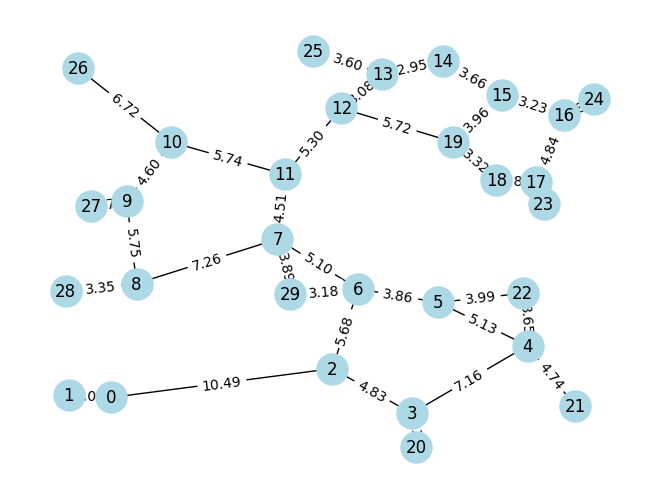

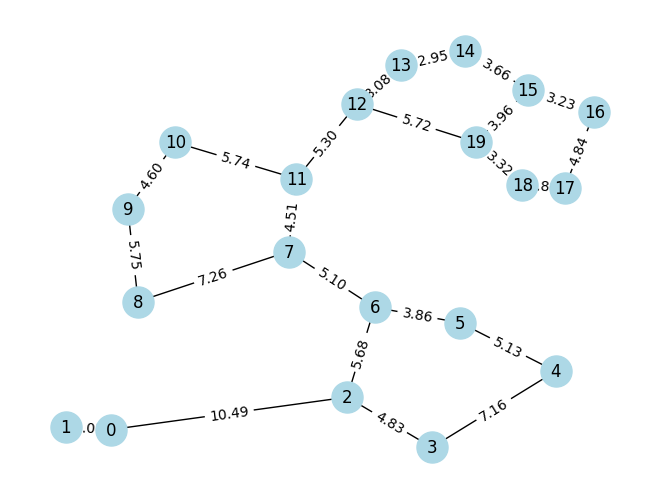

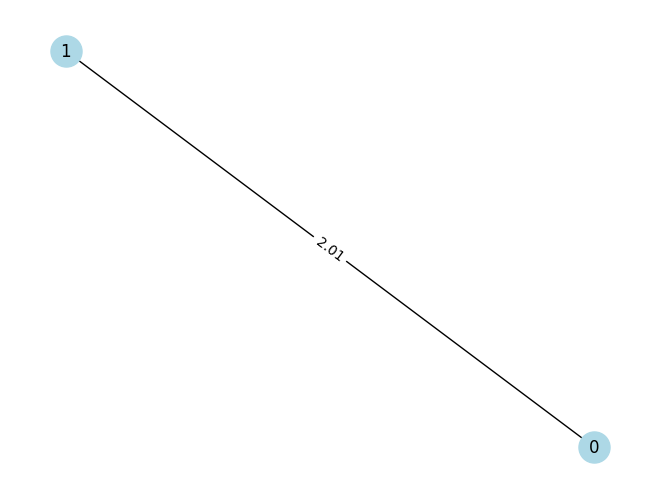

In [5]:
# Coordinates extracted manually from the cave map
coordinates = [(  0.00,  0.00), #  0 - spawn point
                ( -2.00,  0.17), #  1 - charging station
                ( 10.30,  2.00), #  2
                ( 14.00, -1.10), #  3
                ( 19.40,  3.60), #  4
                ( 15.24,  6.60), #  5
                ( 11.50,  7.55), #  6
                (  7.74, 11.00), #  7
                (  1.17,  7.91), #  8
                (  0.72, 13.64), #  9
                (  2.80, 17.74), # 10
                (  8.08, 15.50), # 11
                ( 10.72, 20.10), # 12
                ( 12.63, 22.51), # 13
                ( 15.44, 23.41), # 14
                ( 18.19, 21.00), # 15
                ( 21.10, 19.60), # 16
                ( 19.80, 14.94), # 17
                ( 17.95, 15.11), # 18
                ( 15.93, 17.75), # 19
                ( 14.21, -3.47), # 20 - target  #1
                ( 21.61, -0.59), # 21 - target  #2
                ( 19.18,  7.24), # 22 - target  #3
                ( 20.16, 13.45), # 23 - target  #4
                ( 22.52, 20.71), # 24 - target  #5
                (  9.40, 24.10), # 25 - target  #6
                ( -1.55, 22.86), # 26 - target  #7
                ( -0.94, 13.28), # 27 - target  #8
                ( -2.14,  7.38), # 28 - target  #9
                (  8.34,  7.16)] # 29 - target #10

# Connection between nodes
connections = [( 0, 1),
                ( 0, 2),
                ( 2, 3),
                ( 2, 6),
                ( 3, 4),
                ( 4, 5),
                ( 5, 6),
                ( 6, 7),
                ( 7, 8),
                ( 7,11),
                ( 8, 9),
                ( 9,10),
                (10,11),
                (11,12),
                (12,13),
                (12,19),
                (13,14),
                (14,15),
                (15,16),
                (15,19),
                (16,17),
                (17,18),
                (18,19),
                ( 3,20),
                ( 4,21),
                ( 4,22),
                ( 5,22),
                (17,23),
                (16,24),
                (13,25),
                (10,26),
                ( 9,27),
                ( 8,28),
                ( 7,29),
                ( 6,29)]

# Create graphs 
full_graph = nx.Graph()
robot_graph = nx.Graph()
target_graph = nx.Graph()

# Add nodes
for i, coord in enumerate(coordinates):
    target_graph.add_node(i, pos=coord)
    if i <= 19:
        full_graph.add_node(i, pos=coord)
    if i <= 1:
        robot_graph.add_node(i, pos=coord)

# Add edges with weights as Euclidean distances
for (u, v) in connections:
    distance = euclidean_distance(coordinates[u], coordinates[v])

    if u in target_graph.nodes and v in target_graph.nodes:
        target_graph.add_edge(u, v, weight=distance)  

    if u in full_graph.nodes and v in full_graph.nodes:
        full_graph.add_edge(u, v, weight=distance)

    if u in robot_graph.nodes and v in robot_graph.nodes:
        robot_graph.add_edge(u, v, weight=distance)

show_graph(target_graph)
show_graph(full_graph)
show_graph(robot_graph)


In [8]:
1 in robot_graph.nodes

True

In [ ]:
len(target_graph.nodes)-5

In [ ]:
list(nx.get_node_attributes(target_graph,'pos').values())[len(target_graph.nodes)-10:]

In [ ]:
path = nx.shortest_path(full_graph, source=0, target=16, weight='weight')
print(path)

In [ ]:
path = path[1:]
print(path)

In [ ]:
for i in full_graph.neighbors(6):
    print(i)

In [ ]:
for i in full_graph.adjacency():
    print(i)

In [ ]:
for node in robot_graph.nodes:
    print(type(node))

In [ ]:
def find_nearest_node(robot_position, robot_graph):
        nearest_node = None
        min_distance = float('inf')  

        for node in robot_graph.nodes:
            node_position = robot_graph.nodes[node]['pos']  
            distance = math.sqrt((robot_position[0] - node_position[0])**2 + (robot_position[1] - node_position[1])**2)
            if distance < min_distance:
                min_distance = distance
                nearest_node = node

        return nearest_node

In [ ]:
robot_current_node = find_nearest_node([0, 0], robot_graph)
robot_current_node_adj = [n for n in full_graph.neighbors(robot_current_node)]
robot_current_node_adj_unvisited = [n for n in robot_current_node_adj if not(robot_graph.has_node(n))]

print(robot_current_node)
print(robot_current_node_adj)
print(robot_current_node_adj_unvisited)

In [ ]:
a = []
a == []

In [ ]:
np.random.choice([1, 2, 5, 7])

In [ ]:
[u_adj for u_adj in full_graph.neighbors(u)]

In [9]:
def robot_graph_adj_nodes(robot_graph, full_graph):
    adj_nodes = []
    for u in full_graph.nodes:
        if not(u in robot_graph.nodes):
            u_adj = [u_adj for u_adj in full_graph.neighbors(u)]
            for v in u_adj:
                if v in robot_graph and not(u in adj_nodes):
                    adj_nodes.append(u)
                    break
    return adj_nodes

In [10]:
def add_node_to_robot_graph(u, robot_graph, full_graph):
    u_adj = [u_adj for u_adj in full_graph.neighbors(u)]

    for n in robot_graph.nodes:
        if n in u_adj:
            robot_graph.add_node(u, pos=full_graph.nodes[u]['pos'])
            break

    for e in full_graph.edges:
        for v in robot_graph.nodes:
            if v in e and u in e and not(v == u):
                robot_graph.add_edge(u, v, weight=full_graph.edges[u,v]['weight'])
                break


In [ ]:
full_graph.nodes[0]['pos']

In [ ]:
full_graph.number_of_nodes()

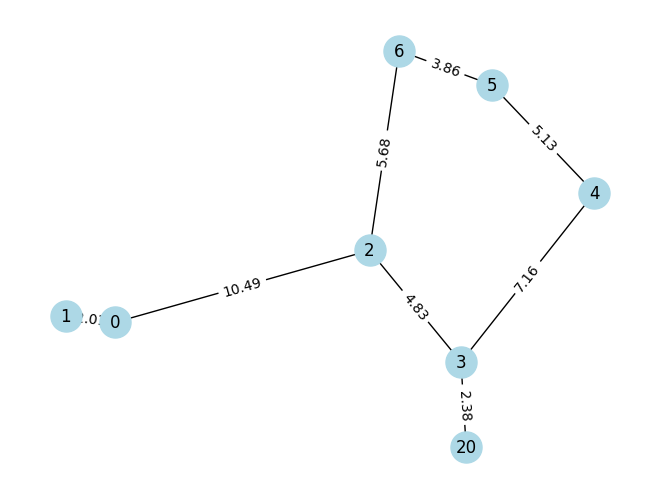

[7]

In [17]:
add_node_to_robot_graph(20, robot_graph, target_graph)

pos = nx.get_node_attributes(robot_graph, 'pos')  # Get node positions
labels = nx.get_edge_attributes(robot_graph, 'weight')  # Get edge weights

nx.draw(robot_graph, pos, with_labels=True, node_color='lightblue', node_size=500)
nx.draw_networkx_edge_labels(robot_graph, pos, edge_labels={k: f"{v:.2f}" for k, v in labels.items()})

plt.show()

robot_graph_adj_nodes(robot_graph, full_graph)

In [22]:
a = None
a== None

True

In [20]:
[i for i in range(20,30)]

[20, 21, 22, 23, 24, 25, 26, 27, 28, 29]

In [18]:
20 in robot_graph.nodes

True

In [6]:
a = 'asdasdad'
a_list = list(a)
a_list.insert(3, 'a')
"".join(a_list)

'asdaasdad'

In [ ]:
target_in_graph = [u for u in range(20,30) if u in robot_graph]
target_in_graph

In [ ]:
robot_graph.remove_node(20, pos=(20,20))

In [ ]:
robot_graph_adj_nodes(robot_graph, full_graph)

In [ ]:
A=list(range(14))
A[-len(A)+10:]

In [ ]:
for u in robot_graph.nodes:
    print(robot_graph.nodes[u]['pos'])

In [ ]:
for u, pos in nx.get_node_attributes(robot_graph, 'pos'):
    if euclidean_distance((0,0), pos) < 0.1:
        robot_graph.remove_node(u)

In [ ]:
robot_graph.remove_node(20)

In [ ]:
robot_graph.nodes

In [ ]:
robot_graph.edges

In [ ]:
full_graph.edges[0,2]['weight']

In [ ]:
[e for e in full_graph.edges]

In [ ]:
[n for n in robot_graph.nodes]

In [ ]:
3 in robot_graph.nodes

In [ ]:
G = nx.Graph()
G.add_node(1, pos=(0,0))

pos = nx.get_node_attributes(G, 'pos')  # Get node positions
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500)

In [ ]:
H = G

pos = nx.get_node_attributes(H, 'pos')  # Get node positions
nx.draw(H, pos, with_labels=True, node_color='lightblue', node_size=500)

In [ ]:
H.add_node(3, pos = (2,2))

pos = nx.get_node_attributes(H, 'pos')  # Get node positions
nx.draw(H, pos, with_labels=True, node_color='lightblue', node_size=500)

In [ ]:
pos = nx.get_node_attributes(G, 'pos')  # Get node positions
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500)

In [ ]:
A = [None, None, None, None, None]

None in A

In [ ]:
A = ['a', 'b', 'c']
B = [2, 1, 3]

B[A=='a']

In [ ]:
from spatialmath import SE3
import numpy as np

target_position = SE3([1,2,3])
target_position

In [ ]:
target_position = SE3(1,2,3)
target_position

In [ ]:
q = np.pi/6
R = np.array([[np.cos(q), -np.sin(q), 0],[np.sin(q), np.cos(q), 0], [0, 0, 1]])
R = np.array([[1, 0, 0], [0, 0, -1], [0, 1, 0]])

In [ ]:
SE3.Rt(R)

In [ ]:
P =np.array([[-9.99999762e-01,  5.86005940e-08, -7.99380593e-07],
       [-7.99380713e-07, -2.04262036e-06,  9.99999762e-01],
       [ 5.85989611e-08,  1.00000000e+00,  2.04262041e-06]])

In [ ]:
from spatialmath.base import r2q,q2r, qmatrix

P = r2q(P)

In [ ]:
SE3.Rz(np.pi)

In [ ]:
Q = qmatrix(P)
Q

In [ ]:
def isRotationMatrix(R):
    # square matrix test
    if R.ndim != 2 or R.shape[0] != R.shape[1]:
        return False
    should_be_identity = np.allclose(R.dot(R.T), np.identity(R.shape[0], float))
    should_be_one = np.allclose(np.linalg.det(R), 1)
    return should_be_identity and should_be_one



print(isRotationMatrix(P))

In [ ]:
np.linalg

In [ ]:
Q = [0.11351262032985687, -0.6976785063743591, -0.6950702667236328, 0.1312887817621231]
R = q2r(Q,"xyzs")
R

In [ ]:
R.round(2)

In [ ]:
np.linalg.det(R)

In [ ]:
R.dot(R.T)

In [ ]:
np.allclose(R.dot(R.T), np.identity(R.shape[0], float))

In [ ]:
import torch

A = torch.tensor([[1.0, 0.0, 0.0, 0.0]])
A[0,0]

In [ ]:
len(A)

In [ ]:
import numpy as np

B = np.array([[1.0, 0.0, 0.0, 0.0]])
B.shape[0]

In [ ]:
robot_name = "robot"

if  len(robot_name) != 0 and robot_name[0] != '/':
    robot_name = '/' + robot_name

robot_name

In [ ]:
C = ''
len(C)

In [32]:
import torch
import numpy as np

target_spawn_pool = torch.tensor(
                    [[ 14.0, -4.0,  0.1],
                     [ 22.0, -1.0,  0.1],
                     [ 19.5,  7.7,  0.1],
                     [ 20.5, 13.0,  0.1],
                     [ 23.0, 21.0,  0.1],
                     [  9.0, 24.5,  0.1],
                     [ -2.0, 23.2,  0.1],
                     [ -1.5, 13.3,  0.1],
                     [ -2.6,  7.7,  0.1],
                     [  8.0,  6.7,  0.1]])

env_id = 3

In [36]:
def get_random_target_pos(num_env, mode = 'different'):
    """
    Generate random target positions from a predefined pool.
    
    Args:
        num_env (int): Number of environments.
    
    Returns:
        torch.Tensor: Randomly selected target positions.
    """
    # Possible target spawn point
    target_spawn_pool = torch.tensor(
                    [[ 14.0, -4.0,  0.1],
                     [ 22.0, -1.0,  0.1],
                     [ 19.5,  7.7,  0.1],
                     [ 20.5, 13.0,  0.1],
                     [ 23.0, 21.0,  0.1],
                     [  9.0, 24.5,  0.1],
                     [ -2.0, 23.2,  0.1],
                     [ -1.5, 13.3,  0.1],
                     [ -2.6,  7.7,  0.1],
                     [  8.0,  6.7,  0.1]])
    
    if mode == 'different': target_pos = torch.cat([target_spawn_pool[torch.randperm(len(target_spawn_pool))[:5]].unsqueeze(0) for _ in range(num_env)], dim=0)
    elif mode == 'same'   : target_pos = torch.cat([target_spawn_pool[torch.randperm(len(target_spawn_pool))[:5]].unsqueeze(0)] * num_env, dim=0)
    return target_pos

In [89]:
get_random_target_pos(5, mode='same')

tensor([[[ 9.0000, 24.5000,  0.1000],
         [23.0000, 21.0000,  0.1000],
         [-1.5000, 13.3000,  0.1000],
         [22.0000, -1.0000,  0.1000],
         [19.5000,  7.7000,  0.1000]],

        [[ 9.0000, 24.5000,  0.1000],
         [23.0000, 21.0000,  0.1000],
         [-1.5000, 13.3000,  0.1000],
         [22.0000, -1.0000,  0.1000],
         [19.5000,  7.7000,  0.1000]],

        [[ 9.0000, 24.5000,  0.1000],
         [23.0000, 21.0000,  0.1000],
         [-1.5000, 13.3000,  0.1000],
         [22.0000, -1.0000,  0.1000],
         [19.5000,  7.7000,  0.1000]],

        [[ 9.0000, 24.5000,  0.1000],
         [23.0000, 21.0000,  0.1000],
         [-1.5000, 13.3000,  0.1000],
         [22.0000, -1.0000,  0.1000],
         [19.5000,  7.7000,  0.1000]],

        [[ 9.0000, 24.5000,  0.1000],
         [23.0000, 21.0000,  0.1000],
         [-1.5000, 13.3000,  0.1000],
         [22.0000, -1.0000,  0.1000],
         [19.5000,  7.7000,  0.1000]]])

In [ ]:
env_origin = torch.tensor(
                    [[ 14.0, -4.0,  0.1],
                     [ 22.0, -1.0,  0.1],
                     [ 19.5,  7.7,  0.1],
                     [ 20.5, 13.0,  0.1],
                     ])

In [ ]:
a = env_origin.repeat([get_random_target_pos(4).shape[1],1,1])
torch.transpose(a, 0,1)

In [ ]:
get_random_target_pos(4).shape[1]

In [ ]:
get_random_target_pos(4).shape

In [ ]:
get_random_target_pos(4)

In [ ]:
get_random_target_pos(4) + torch.transpose(a, 0,1)

In [ ]:
for i in range(env_id):
    target_spawn_ind = np.random.default_rng().permutation(len(target_spawn_pool))
    temp = target_spawn_pool[target_spawn_ind[:5]].unsqueeze(0)  
    if i == 0:
        target_pos = temp
    else:
        target_pos = torch.cat((target_pos, temp),dim=0)

target_pos

In [ ]:
a = ['a', 'b', 'c']
b = ['A', 'B', 'C']

for i, (a,b) in enumerate(zip(a,b)):
    print(i, a, b)

In [ ]:
class Object():
    def __init__(self, pos: list | tuple | np.ndarray | torch.Tensor, env_id: int, scene):
        self.env_id = env_id
        self.scene = scene
        self.pos = pos
        self.status = 'settled'
        self.host = None

    def pick(self, host: str = "robot"):
        self.status = 'picked'
        self.host = host

    def drop(self):
        self.pos = self.scene[self.host].data.root_state_w[self.env_id, :3]
        self.status = 'settled'
        self.host = None

    def get_pos(self):
        if self.status == 'settled':
            return self.pos
        elif self.status == 'picked':
            return self.scene[self.host].data.root_state_w[self.env_id, :3]
        else:
            raise ValueError('Invalid object status.')

In [ ]:
type(target_spawn_pool)

In [ ]:
B[0] = 0

In [ ]:
import networkx
import numpy as np

def graph_init(offset):
    """
    Initialize the graph representation of the cave map.
    
    Args:
        offset (tuple): (x, y) offset to apply to all coordinates.
    
    Returns:
        tuple: Three NetworkX graphs (target_graph, full_graph, robot_graph) representing different aspects of the environment.
    """
    coordinates = [(  0.00,  0.00), #  0 - spawn point
                   ( -2.00,  0.17), #  1 - charging station
                   ( 10.30,  2.00), #  2
                   ( 14.00, -1.10), #  3
                   ( 19.40,  3.60), #  4
                   ( 15.24,  6.60), #  5
                   ( 11.50,  7.55), #  6
                   (  7.74, 11.00), #  7
                   (  1.17,  7.91), #  8
                   (  0.72, 13.64), #  9
                   (  2.80, 17.74), # 10
                   (  8.08, 15.50), # 11
                   ( 10.72, 20.10), # 12
                   ( 12.63, 22.51), # 13
                   ( 15.44, 23.41), # 14
                   ( 18.19, 21.00), # 15
                   ( 21.10, 19.60), # 16
                   ( 19.80, 14.94), # 17
                   ( 17.95, 15.11), # 18
                   ( 15.93, 17.75), # 19
                   ( 14.00, -4.00), # 20 - target  #1
                   ( 22.00, -1.00), # 21 - target  #2
                   ( 19.50,  7.70), # 22 - target  #3
                   ( 20.50, 13.00), # 23 - target  #4
                   ( 23.00, 21.00), # 24 - target  #5
                   (  9.00, 24.50), # 25 - target  #6
                   ( -2.00, 23.20), # 26 - target  #7
                   ( -1.50, 13.30), # 27 - target  #8
                   ( -2.60,  7.70), # 28 - target  #9
                   (  8.00,  6.70)] # 29 - target #10
    
    # Apply offset to all coordinates
    coordinates = [(x + offset[0], y + offset[1]) for (x, y) in coordinates]
    
    # Connection between nodes
    connections = [( 0, 1),
                   ( 0, 2),
                   ( 2, 3),
                   ( 2, 6),
                   ( 3, 4),
                   ( 4, 5),
                   ( 5, 6),
                   ( 6, 7),
                   ( 7, 8),
                   ( 7,11),
                   ( 8, 9),
                   ( 9,10),
                   (10,11),
                   (11,12),
                   (12,13),
                   (12,19),
                   (13,14),
                   (14,15),
                   (15,16),
                   (15,19),
                   (16,17),
                   (17,18),
                   (18,19),
                   ( 3,20),
                   ( 4,21),
                   ( 4,22),
                   ( 5,22),
                   (17,23),
                   (16,24),
                   (13,25),
                   (10,26),
                   ( 9,27),
                   ( 8,28),
                   ( 7,29),
                   ( 6,29)]
    
    # Create graphs 
    full_graph, robot_graph, target_graph = nx.Graph(), nx.Graph(), nx.Graph()

    # Add nodes
    for i, coord in enumerate(coordinates):
        target_graph.add_node(i, pos=coord)
        if i <= 19:
            full_graph.add_node(i, pos=coord)
        if i <= 1:
            robot_graph.add_node(i, pos=coord)

    # Add edges with weights as Euclidean distances
    for (u, v) in connections:
        distance = euclidean_distance(coordinates[u], coordinates[v])

        if u in target_graph.nodes and v in target_graph.nodes:
            target_graph.add_edge(u, v, weight=distance)  

        if u in full_graph.nodes and v in full_graph.nodes:
            full_graph.add_edge(u, v, weight=distance)

        if u in robot_graph.nodes and v in robot_graph.nodes:
            robot_graph.add_edge(u, v, weight=distance)
     
    return target_graph, full_graph, robot_graph

In [26]:
                # Behaviors
behavior_dict = {'a': 'patrol_node',
                    'b': 'find_target_node',
                    'c': 'go_to_nearest_target',
                    'd': 'go_to_charger_node',
                    'e': 'go_to_spawn_node',
                    'f': 'picking_object_node',
                    'g': 'drop_object_node',
                    'h': 'charge_node',
                # Conditions
                    'A': 'is_robot_at_the_charger_node',
                    'B': 'is_robot_at_the_spawn_node',
                    'C': 'is_battery_on_proper_level',
                    'D': 'are_object_existed_on_internal_map',
                    'E': 'are_object_nearby_node',
                    'F': 'is_object_in_hand_node',
                    'G': 'is_nearby_object_not_at_goal',
                    'H': 'are_five_objects_at_spawn',
                    }

In [35]:
tree_string = '(2Aa(1(3Be)c(2Cf)d)b)'
tree_string

'(2Aa(1(3Be)c(2Cf)d)b)'

In [ ]:
i = 0
for n in tree_string[2:]:
    if n == '(':
        subtree = ''
        n_open = 0
        
        for sn in tree_string[2+i:]:
            subtree += sn

            if sn == '(':
                n_open += 1
            elif sn == ')':
                n_open -= 1
                
            if n_open == 0:
                print(subtree)
                break
    i += 1
        

(1(3Be)c(2Cf)d)
(3Be)
(2Cf)


In [29]:
'A' in behavior_dict.keys()

True

In [31]:
behavior_dict['A']

'is_robot_at_the_charger_node'

In [44]:
import numpy as np
import math

dis = euclidean_distance((-40,0),(-42.599998474121094,7.699999809265137))
dis

8.127114440446569

In [3]:
a = ['r']
a*3

['r', 'r', 'r']

In [8]:
def insert_char(s: str, char: str, pos: int) -> str:
    """
    Insert `char` into `s` at the `pos`-th valid position.
    A valid position is any index in the range [0, len(s)] such that:
       - If index < len(s), then s[index] is NOT a digit.
       - The end of the string (index == len(s)) is always valid.
    
    Parameters:
        s (str): The original string.
        char (str): The character to insert.
        pos (int): The position (0-indexed) among the valid insertion points.
    
    Returns:
        str: The string after insertion.
    
    Raises:
        ValueError: If pos is out of the range of valid insertion positions.
    """
    valid_indices = []
    
    # Iterate over all potential insertion positions (0 to len(s))
    for i in range(len(s) + 1):
        # If we are not at the end and the character at i is a digit, skip this index.
        if i < len(s) and s[i].isdigit():
            continue
        valid_indices.append(i)
    
    if pos < 0 or pos >= len(valid_indices):
        raise ValueError("Insertion position is out of range of valid positions.")
    
    # Get the actual index in the string where we want to insert the char.
    insert_index = valid_indices[pos]
    
    # Return the new string with the character inserted.
    return s[:insert_index] + char + s[insert_index:]


# Example usage:
s = "1Aa(0(2B)c(1Cf)d)b"
result = insert_char(s, 'e', 2)
print(result)  # Output: "1Aa(0(2Be)c(1Cf)d)b"

1Aae(0(2B)c(1Cf)d)b


In [18]:
s = "(1Aa(0(2B)c(1Cf)d)b)"
s_temp = s[1:-1]  # Remove the outer parentheses
s_temp

'1Aa(0(2B)c(1Cf)d)b'

In [32]:
def modify_bt(current_bt, node_type, node_location):
    """Modify the BT string"""
    # Interpret node_type
                    # Flow Control
    node_dict = {   0 : '(0)', #patrol_node
                    1 : '(1)', #find_target_node
                    2 : '(2)', #go_to_nearest_target
                    # Behaviors
                    3 : 'a', #patrol_node
                    4 : 'b', #find_target_node
                    5 : 'c', #go_to_nearest_target
                    6 : 'd', #go_to_charger_node
                    7 : 'e', #go_to_spawn_node
                    8 : 'f', #picking_object_node
                    9 : 'g', #drop_object_node
                    10 : 'h', #charge_node
                    # Conditions
                    11 : 'A', #is_robot_at_the_charger_node
                    12 : 'B', #is_robot_at_the_spawn_node
                13 : 'C', #is_battery_on_proper_level
                14 : 'D', #are_object_existed_on_internal_map
                15 : 'E', #are_object_nearby_node
                16 : 'F', #is_object_in_hand_node
                17 : 'G', #is_nearby_object_not_at_goal
                18 : 'H', #are_five_objects_at_spawn
                # Specials
                19 : None, #stop node
                }
    node = node_dict[node_type]

    # Add a node to the BT string at the specified location
    bt_string = current_bt[1:-1]  # Remove the outer parentheses

    if node != None:
        valid_indices = []

        # Iterate over all potential insertion positions (0 to len(s))
        valid_indices = [j for j in range(len(bt_string)+1) if j == len(bt_string) or not bt_string[j].isdigit()]

        if 0 <=  node_location < len(valid_indices):
            # Get the actual index in the string where we want to insert the char.
            insert_index = valid_indices[node_location]

            # Return the new string with the character inserted.
            return '(' + bt_string[:insert_index] + node + bt_string[insert_index:] + ')'
        
    return current_bt

In [48]:
bt = "(1Aa(0(2B)c(1Cf)d)b)"
modify_bt(bt, 19, 14)

'(1Aa(0(2B)c(1Cf)d)b)'

In [3]:
import torch

a = torch.tensor([1,2,3], dtype=torch.float32)

In [26]:
bt_string_array = [''] * 3
bt_string_array[1] = '(0(1C(0(1Ad)h))(0(1F(0(1(0EG)(0(1D(2ab))c))f))(1Be)g))'
bt_string_array

['', '(0(1C(0(1Ad)h))(0(1F(0(1(0EG)(0(1D(2ab))c))f))(1Be)g))', '']

In [4]:
bt_string = '(0(1C(0(1Ad)h))(0(1F(0(1(0EG)(0(1D(2ab))c))f))(1Be)g))'
bt_string = '(1H'+bt_string+')'
bt_string

'(1H(0(1C(0(1Ad)h))(0(1F(0(1(0EG)(0(1D(2ab))c))f))(1Be)g)))'

In [24]:
bt_string = bt_string[1:-1] if bt_string.startswith('(') else bt_string
valid_locs_on_string = [j for j in range(len(bt_string)+1) if j == len(bt_string) or not bt_string[j].isdigit()] # Find valid location on BT string
valid_locs = range(len(valid_locs_on_string))
all_actions = [(nt, loc) for nt in range(20) for loc in range(len(valid_locs))]

all_actions

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (0, 19),
 (0, 20),
 (0, 21),
 (0, 22),
 (0, 23),
 (0, 24),
 (0, 25),
 (0, 26),
 (0, 27),
 (0, 28),
 (0, 29),
 (0, 30),
 (0, 31),
 (0, 32),
 (0, 33),
 (0, 34),
 (0, 35),
 (0, 36),
 (0, 37),
 (0, 38),
 (0, 39),
 (0, 40),
 (0, 41),
 (0, 42),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11),
 (1, 12),
 (1, 13),
 (1, 14),
 (1, 15),
 (1, 16),
 (1, 17),
 (1, 18),
 (1, 19),
 (1, 20),
 (1, 21),
 (1, 22),
 (1, 23),
 (1, 24),
 (1, 25),
 (1, 26),
 (1, 27),
 (1, 28),
 (1, 29),
 (1, 30),
 (1, 31),
 (1, 32),
 (1, 33),
 (1, 34),
 (1, 35),
 (1, 36),
 (1, 37),
 (1, 38),
 (1, 39),
 (1, 40),
 (1, 41),
 (1, 42),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10),
 (2, 11),
 (2, 12),
 (2, 13),
 (2, 14),
 (2, 15),
 (2, 16),


In [153]:
def complexity(bt_string):
    depth = 0
    complexity = 0
    depth_width = {}

    # First pass to compute depth_width
    for char in bt_string:
        if char == '(':
            depth += 1
        elif char == ')':
            depth -= 1
        elif char.isdigit():
            depth_width[depth - 1] = depth_width.get(depth - 1, 0) + 1
        else:
            depth_width[depth] = depth_width.get(depth, 0) + 1

    # Reset depth for second pass to compute complexity
    depth = 0
    for char in bt_string:
        if char == '(':
            depth += 1
        elif char == ')':
            depth -= 1
        elif char.isdigit():
            if depth > 0 and depth - 1 in depth_width and depth > 0:
                complexity += depth * np.log(depth_width[depth - 1]) * np.log(depth)
        else:
            if depth in depth_width:
                complexity += (depth + 1) * np.log(depth_width[depth]) * np.log(depth + 1)

    return complexity

complexity(bt_string)

367.7042361498193

In [97]:
import numpy as np

a = [True, True, True]
np.array(a).all()

True

In [104]:
(False and False) * 5

0

In [161]:
node_type = 20
0 <= node_type <= 19

False

In [164]:
x = [-4,-3,-2,-1,0,1,2,3,4,5]
max(x,key=lambda x: np.sin(x))

2

In [1]:
###
#  Neural Network for Policy
###
import torch
import torch.nn as nn
import torch.optim as optim
from torch.nn.utils.rnn import pad_sequence

# ----------- Behavior Dictionary (char -> node type index) ----------- #
            # Flow Control
node_dict = { 0 : '0', # sequence_node
              1 : '1', # selector_node
              2 : '2', # parallel_node
            # Behaviors
              3 : 'a',   # patrol_node
              4 : 'b',   # find_target_node
              5 : 'c',   # go_to_nearest_target
              6 : 'd',   # go_to_charger_node
              7 : 'e',   # go_to_spawn_node
              8 : 'f',   # picking_object_node
              9 : 'g',   # drop_object_node
             10 : 'h',   # charge_node
            # Conditions
              11 : 'A',   # is_robot_at_the_charger_node
              12 : 'B',   # is_robot_at_the_spawn_node
              13 : 'C',   # is_battery_on_proper_level
              14 : 'D',   # are_object_existed_on_internal_map
              15 : 'E',   # are_object_nearby_node
              16 : 'F',   # is_object_in_hand_node
              17 : 'G',   # is_nearby_object_not_at_goal
              18 : 'H',   # are_five_objects_at_spawn
            # Specials
              19 : None, #stop node
            }

# === Inverted character -> type index ===
char_to_node_type = {v: k for k, v in node_dict.items() if v is not None}

# === Composite node types ===
composite_chars = {'0', '1', '2'}

class TreeNode:
    """
    Simple recursive tree structure to represent a Behavior Tree (BT) node.
    
    Args:
        name (str): Node name for readability.
        node_type (int): Index representing the type of node (from node_dict).
        children (list): List of child TreeNode objects.
    """
    def __init__(self, name, node_type, children=None):
        self.name = name
        self.node_type = node_type
        self.children = children if children else []


def string_to_tree_node(tree_string, node_id=0):
    """
    Parse a BT string representation directly into a TreeNode-based tree.
    
    Args:
        tree_string (str): A BT string like "(0a(1bC))".
        node_id (int): Used for naming composite nodes uniquely (optional).
    
    Returns:
        TreeNode: Root of the parsed tree.
    """
    assert tree_string[0] == '(', "[Error] Tree must start with '('"
    assert tree_string[-1] == ')', "[Error] Tree must end with ')'"

    # First character after '(' is the root node type
    node_type_char = tree_string[1]
    
    if node_type_char in composite_chars:
        # It's a flow control (composite) node
        node_type = char_to_node_type[node_type_char]
        name = f"composite_{node_id}"
        node_id += 1
    elif node_type_char in char_to_node_type:
        # It's a single behavior/condition node
        node_type = char_to_node_type[node_type_char]
        name = f"leaf_{node_type_char}"
        return TreeNode(name, node_type)
    else:
        raise ValueError(f"[Error] Unknown node type char: {node_type_char}")

    # Recursively parse children
    children = []
    i = 2
    while i < len(tree_string) - 1:
        c = tree_string[i]
        if c == '(':
            # Start of a subtree
            depth = 1
            start = i
            while depth != 0:
                i += 1
                if tree_string[i] == '(':
                    depth += 1
                elif tree_string[i] == ')':
                    depth -= 1
            subtree = tree_string[start:i+1]
            child = string_to_tree_node(subtree, node_id)
            children.append(child)
            i += 1
        elif c in char_to_node_type:
            # Leaf node (single character)
            child = TreeNode(f"leaf_{c}", char_to_node_type[c])
            children.append(child)
            i += 1
        else:
            print("[Error] Skipping unknown char:", c)
            i += 1

    return TreeNode(name, node_type, children)


In [14]:
class RvNN(nn.Module):
    """
    Recursive Neural Network for encoding Behavior Trees and predicting
    two discrete action probability distributions:
        1. Node type to expand
        2. Node location to apply expansion

    Args:
        node_type_vocab_size (int): Total number of node types (typically 20).
        embed_size (int): Size of the embedding vector for each node.
        hidden_size (int): Size of the hidden vector in recursive processing.
        action1_size (int): Output size for action 1 (node type prediction).
        action2_size (int): Output size for action 2 (location prediction).
    """
    def __init__(self, node_type_vocab_size, embed_size, hidden_size, action1_size, action2_size):
        super(RvNN, self).__init__()
        self.node_embedding = nn.Embedding(node_type_vocab_size, embed_size)
        self.W_c = nn.Linear(embed_size + hidden_size, hidden_size)
        self.activation = nn.Tanh()

        self.output_action1 = nn.Linear(hidden_size, action1_size)
        self.output_action2 = nn.Linear(hidden_size, action2_size)

        self.child_gru = nn.GRU(hidden_size, hidden_size, batch_first=True)

    def forward(self, node):
        """
        Forward pass: encode a TreeNode structure recursively.

        Args:
            node (TreeNode): Root node of the tree.

        Returns:
            torch.Tensor: Hidden vector encoding of the tree.
        """
        return self._encode_node(node)

    def _encode_node(self, node):
        """
        Internal method to recursively encode a TreeNode using a child-GRU.

        Args:
            node (TreeNode): A node to process.

        Returns:
            torch.Tensor: Encoded hidden state for this subtree.
        """
        if not node.children:
            embed = self.node_embedding(torch.tensor([node.node_type]))
            zero_pad = torch.zeros(self.W_c.in_features - embed.size(1), device=embed.device)
            h = self.activation(self.W_c(torch.cat([embed.squeeze(0), zero_pad])))
            return h

        # Encode children recursively
        child_states = [self._encode_node(child).unsqueeze(0) for child in node.children]
        child_seq = torch.cat(child_states, dim=0).unsqueeze(0)  # shape: [1, num_children, hidden_size]

        _, last_hidden = self.child_gru(child_seq)  # shape: [1, 1, hidden_size]
        child_encoding = last_hidden.squeeze(0).squeeze(0)  # shape: [hidden_size]

        embed = self.node_embedding(torch.tensor([node.node_type]))
        concat = torch.cat([embed.squeeze(0), child_encoding])  # [embed + child_hidden]
        h = self.activation(self.W_c(concat))
        return h

    def predict_from_bt_string(self, bt_string):
        """
        Predict probability distributions for two actions from a BT string.

        Args:
            bt_string (str): A string representing a Behavior Tree (e.g., "(0a(1bC)").

        Returns:
            Tuple[Tensor, Tensor]: Probabilities for action1 (node type), action2 (location).
        """
        root = string_to_tree_node(bt_string)
        h = self.forward(root)

        action1_logits = self.output_action1(h)
        action2_logits = self.output_action2(h)

        action1_probs = torch.softmax(action1_logits, dim=0)
        action2_probs = torch.softmax(action2_logits, dim=0)

        return action1_probs, action2_probs

# Example Behavior Tree string
bt_str = "(0a(1bC))"  # Sequence node → a + (Selector → b, C)

# Instantiate the model
model = RvNN(
    node_type_vocab_size=20,  # 0 to 19
    embed_size=64,
    hidden_size=128,
    action1_size=20,          # Number of node types to choose from
    action2_size=99           # Max insertion locations
)

# Make prediction from BT string
probs1, probs2 = model.predict_from_bt_string(bt_str)

# Print outputs
print("Action1 probs (Node Type):", probs1)
print("Action2 probs (Location):", probs2)


Action1 probs (Node Type): tensor([0.0476, 0.0420, 0.0452, 0.0478, 0.0504, 0.0409, 0.0434, 0.0515, 0.0474,
        0.0817, 0.0476, 0.0403, 0.0541, 0.0603, 0.0490, 0.0357, 0.0490, 0.0315,
        0.0646, 0.0699], grad_fn=<SoftmaxBackward0>)
Action2 probs (Location): tensor([0.0112, 0.0086, 0.0111, 0.0095, 0.0058, 0.0134, 0.0091, 0.0124, 0.0146,
        0.0096, 0.0111, 0.0110, 0.0106, 0.0114, 0.0084, 0.0073, 0.0090, 0.0095,
        0.0109, 0.0077, 0.0123, 0.0089, 0.0143, 0.0135, 0.0123, 0.0103, 0.0108,
        0.0110, 0.0098, 0.0068, 0.0105, 0.0148, 0.0101, 0.0080, 0.0132, 0.0088,
        0.0104, 0.0069, 0.0119, 0.0096, 0.0106, 0.0071, 0.0078, 0.0103, 0.0113,
        0.0149, 0.0099, 0.0083, 0.0082, 0.0083, 0.0116, 0.0147, 0.0080, 0.0109,
        0.0119, 0.0118, 0.0113, 0.0075, 0.0099, 0.0099, 0.0152, 0.0106, 0.0055,
        0.0077, 0.0065, 0.0076, 0.0102, 0.0135, 0.0090, 0.0076, 0.0083, 0.0104,
        0.0082, 0.0095, 0.0115, 0.0113, 0.0112, 0.0123, 0.0098, 0.0117, 0.0107,
        0.0093

In [29]:
max_prob1 = np.max(probs1.detach().numpy())
max_prob1

0.08172386

In [24]:
np.max(probs2.detach().numpy())

0.015235066

In [21]:
a = (probs1[0] * probs2[0]).item()
a

0.000534573569893837

In [35]:
b = np.array([max_prob1, 0, max_prob1, 0, max_prob1, 0, max_prob1, 0, max_prob1, 0])
np.where(b == max_prob1)[0]

array([0, 2, 4, 6, 8])

In [3]:
probs2

tensor([0.0093, 0.0088, 0.0092, 0.0123, 0.0135, 0.0102, 0.0094, 0.0089, 0.0101,
        0.0063, 0.0093, 0.0123, 0.0129, 0.0099, 0.0104, 0.0080, 0.0105, 0.0087,
        0.0106, 0.0104, 0.0091, 0.0131, 0.0095, 0.0096, 0.0099, 0.0119, 0.0126,
        0.0091, 0.0129, 0.0104, 0.0097, 0.0085, 0.0099, 0.0105, 0.0082, 0.0091,
        0.0135, 0.0095, 0.0114, 0.0091, 0.0096, 0.0126, 0.0092, 0.0085, 0.0098,
        0.0113, 0.0085, 0.0120, 0.0140, 0.0125, 0.0085, 0.0065, 0.0107, 0.0102,
        0.0087, 0.0090, 0.0094, 0.0108, 0.0097, 0.0103, 0.0113, 0.0108, 0.0105,
        0.0099, 0.0106, 0.0101, 0.0098, 0.0110, 0.0089, 0.0089, 0.0118, 0.0104,
        0.0087, 0.0090, 0.0094, 0.0099, 0.0097, 0.0071, 0.0100, 0.0105, 0.0088,
        0.0116, 0.0152, 0.0124, 0.0091, 0.0085, 0.0082, 0.0112, 0.0099, 0.0105,
        0.0089, 0.0078, 0.0091, 0.0093, 0.0113, 0.0104, 0.0088, 0.0100, 0.0106],
       grad_fn=<SoftmaxBackward0>)

In [43]:
a = [False, False, False]
all(a)

False

In [6]:
# Get all possible actions
bt_string = bt_string[1:-1] if bt_string.startswith('(') else bt_string
valid_locs_on_string = [j for j in range(len(bt_string)+1) if j == len(bt_string) or not bt_string[j].isdigit()] # Find valid location on BT string
valid_locs = range(len(valid_locs_on_string))

[probs2[i] for i in valid_locs]

[tensor(0.0093, grad_fn=<SelectBackward0>),
 tensor(0.0088, grad_fn=<SelectBackward0>),
 tensor(0.0092, grad_fn=<SelectBackward0>),
 tensor(0.0123, grad_fn=<SelectBackward0>),
 tensor(0.0135, grad_fn=<SelectBackward0>),
 tensor(0.0102, grad_fn=<SelectBackward0>),
 tensor(0.0094, grad_fn=<SelectBackward0>),
 tensor(0.0089, grad_fn=<SelectBackward0>),
 tensor(0.0101, grad_fn=<SelectBackward0>),
 tensor(0.0063, grad_fn=<SelectBackward0>),
 tensor(0.0093, grad_fn=<SelectBackward0>),
 tensor(0.0123, grad_fn=<SelectBackward0>),
 tensor(0.0129, grad_fn=<SelectBackward0>),
 tensor(0.0099, grad_fn=<SelectBackward0>),
 tensor(0.0104, grad_fn=<SelectBackward0>),
 tensor(0.0080, grad_fn=<SelectBackward0>),
 tensor(0.0105, grad_fn=<SelectBackward0>),
 tensor(0.0087, grad_fn=<SelectBackward0>),
 tensor(0.0106, grad_fn=<SelectBackward0>),
 tensor(0.0104, grad_fn=<SelectBackward0>),
 tensor(0.0091, grad_fn=<SelectBackward0>),
 tensor(0.0131, grad_fn=<SelectBackward0>),
 tensor(0.0095, grad_fn=<SelectB

In [13]:
probs2 = probs2[:len(valid_locs_on_string)]
max_loc_probs = np.max(probs2)
max_loc_probs

TypeError: max() received an invalid combination of arguments - got (out=NoneType, axis=NoneType, ), but expected one of:
 * ()
 * (Tensor other)
 * (int dim, bool keepdim = False)
      didn't match because some of the keywords were incorrect: out, axis
 * (name dim, bool keepdim = False)
      didn't match because some of the keywords were incorrect: out, axis


In [29]:
all_actions = [(nt, loc) for nt in range(20) for loc in range(99)]
probs = [probs1[nt] * probs2[loc] for nt, loc in all_actions]

sum(probs)

tensor(1.0000, grad_fn=<AddBackward0>)

In [28]:
a = []
not a

True

In [56]:
a = torch.tensor([1,2,3], device='cuda:0')
a.device

device(type='cuda', index=0)

In [33]:
class Node:
    def __init__(self, name):
        self.name = name
        self.me = self

a = Node('A')
a.me.name

'A'